## Klasteryzacja
#### Czym jest klasteryzacja?
Najprościej -- szukaniem skupień (klastrów).
![](https://miro.medium.com/max/561/0*ff7kw5DRQbs_uixR.jpg)
Żródło: https://www.kdnuggets.com/2019/09/hierarchical-clustering.html

#### Po co?
* Aby znaleźć "naturalne" podziały w zbiorze.
* Aby zaproponować podział na klasy.
* Aby ułatwić opis (klastrom można przyporządkować etykiety i do pewnego stopnia traktować jako całość).
* ...

#### Czym właściwie jest klaster?
Nie mamy jednej definicji. Generalnie -- grupa podobnych objektów. Różne algorytmy rożnie "rozumieją" podobieństwo i różnie go szukają.

Zasadniczo metody dzielimy na metody hierarchiczne i niehierachiczne (TODO: jest lepsza nazwa?).
Zacznimy od niehierarchicznych.

### Metoda k-średnich
Pomysł jest prosty:
1. Zakładamy, że w zbiorze jest k klastrów.
2. Losujemy k punktów będącymi początkowymi położeniami środków naszych klastrów.
![](https://upload.wikimedia.org/wikipedia/commons/5/5e/K_Means_Example_Step_1.svg)
3. Określamy przynależność do klastrów jako przynależność do klastra "genrowanego" przez najbliższy środek.
![](https://upload.wikimedia.org/wikipedia/commons/a/a5/K_Means_Example_Step_2.svg)
4. Aktualizujemy położenie środków klastrów jako środek masy punków należących do klastra.
![](https://upload.wikimedia.org/wikipedia/commons/3/3e/K_Means_Example_Step_3.svg)
5. Sprawdzamy, czy przynależność jakiegkolwiek punktu zmieniła się po wyznaczeniu nowych środków. Jeśli tak -- wracmy do punktu 3. Jeśli nie -- kończymy działanie

Źródło ilustracji: https://en.wikipedia.org/wiki/K-means_clustering

Działanie algortymu wygląda następująco:
![](https://miro.medium.com/max/960/1*KrcZK0xYgTa4qFrVr0fO2w.gif)
Żródło: https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

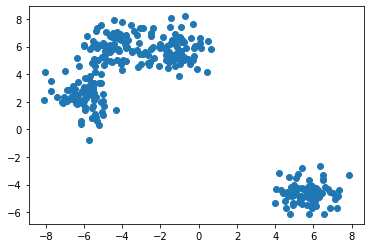

In [54]:
# Nareszcie kod!
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.9, random_state=1234)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [55]:
from sklearn.cluster import KMeans

def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.show()

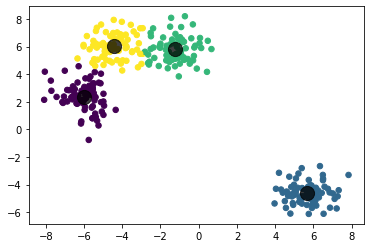

In [56]:
plot_kmeans_clusters(X, n_clusters=4)

TODO: Może fajnie byłoby obejżeć scieżki, po których zbiegają środki. A może to za duzo zabawy programistycznej.

#### A co jeśli podamy złe k?

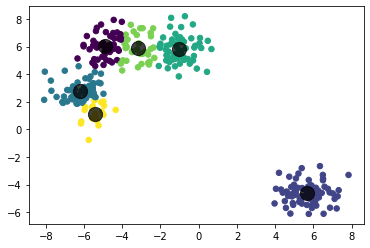

In [82]:
plot_kmeans_clusters(X, n_clusters=6)

#### Zatem jak dobrać liczbę skupień?
Podejście pierwsze: metoda łokcia (elbow method).
Liczymy średnią odległość punktu od środka skupienia (możemy tutaj użyć różnych metryk, my zastosujemy sumę kwadratów odległości). Rysujemy wykres tejże odległości w zależności od liczby klastrów i wybieramy punkt "przegięcia". Wygląda on jak łokieć - stąd nazwa metody.

In [84]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

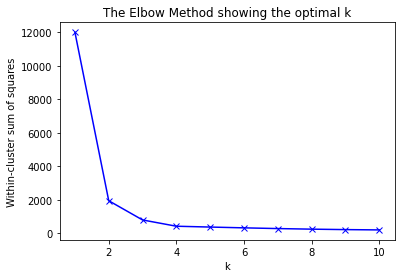

In [85]:
wcss_vec = count_wcss_scores(X, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Oczywiście jest to metoda subiektywna i czasami wybór łokcia jest nieoczywisty. Dlatego w rzeczywistości stosuje się inną metodę:

#### Metoda Silhouette